# Cloud Classification

With tensorflow

### dataset citation (ieee style):
P. Liu, “Cirrus Cumulus Stratus Nimbus (CCSN) Database.” Harvard Dataverse, 2019. doi: 10.7910/DVN/CADDPD.

#### link to dataset:
https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/CADDPD

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import os
import pathlib

from skimage import io
from PIL import Image
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

all images seeem to be 400x400 in width and height

"All images are fixed resolution 256×256 pixels with the JPEG format."

## Just doing some Exploratory Data Analysis(EDA) on the dataset

In [3]:
# here we are defining the path to our dataset using pathlib
# checking to see how many images are in our dataset
data_dir = pathlib.Path("dataset/train/CCSN_v2")
image_count =  len(list(data_dir.glob('*/*.jpg')))
print("total images in our dataset: ", image_count)


total images in our dataset:  2543


Something's to keep track of

Ci = cirrus; Cs = cirrostratus; Cc = cirrocumulus; Ac = altocumulus; As = altostratus; Cu = cumulus; Cb = cumulonimbus; Ns = nimbostratus; Sc = stratocumulus; St = stratus; Ct = contrail

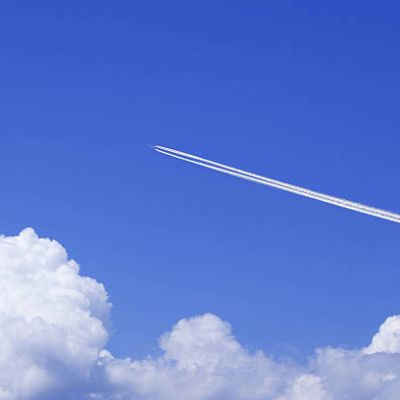

In [4]:
# printing the first contrail cloud in the Ct folder
# you need to sort the data first in order to do this
# so we sort then we create a path to our data directory
contrail = sorted((data_dir.glob('Ct/*')))
PIL.Image.open(str(contrail[0]))

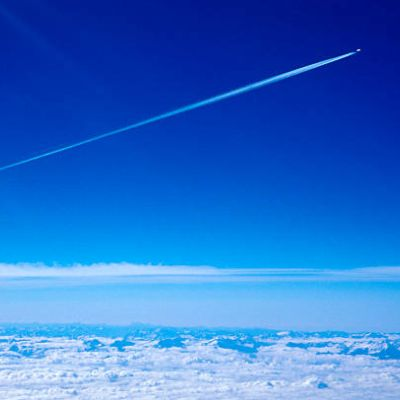

image size is:  (400, 400)


In [11]:
img = PIL.Image.open(str(contrail[1]))
display(img)
print("image size is: ", img.size)

Determining our batch size, height, and width of the image

In [15]:
batch_size = 32
img_height = 256
img_width = 256

In [16]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2543 files belonging to 11 classes.
Using 2035 files for training.


In [19]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2543 files belonging to 11 classes.
Using 508 files for validation.


finding our class names with .class_names attribute

In [20]:
class_names = train_ds.class_names
print(class_names)

['Ac', 'As', 'Cb', 'Cc', 'Ci', 'Cs', 'Ct', 'Cu', 'Ns', 'Sc', 'St']


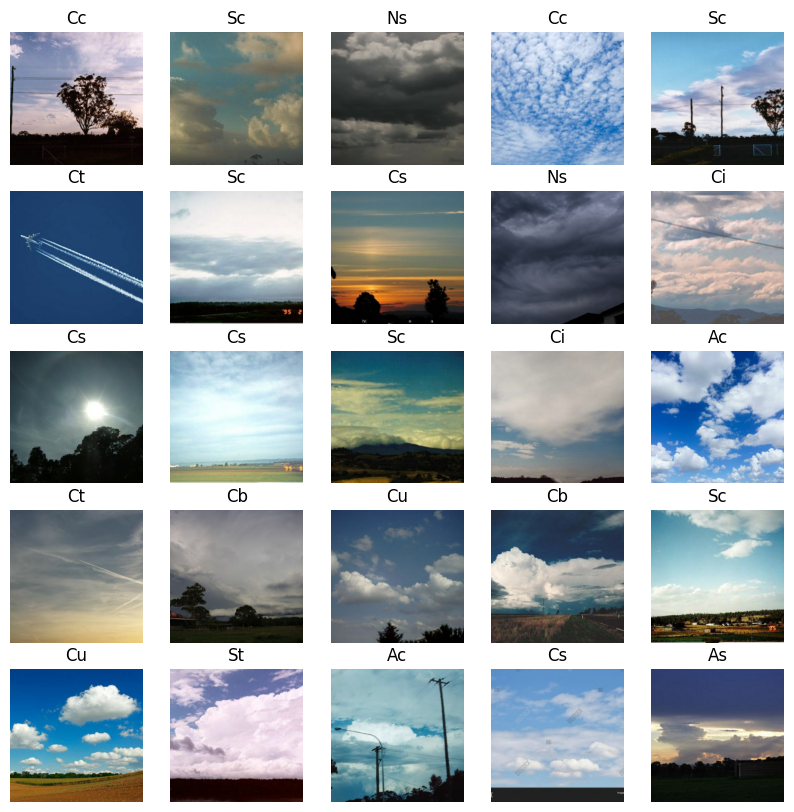

In [46]:
plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):
  for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [47]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)
